# Clustering 군집화 

## 모형 기반 군집분석(Model-based Clustering)
<img src="photo/9.PNG">

<img src="photo/10.PNG">

In [2]:
library(mclust)

 - 표준화를 할 것인지 안할 것인지를 정해야 한다.
 - 표준화를 하지 않고 각 디멘젼의 분산을 구하게 된다면 오차가 생길 확률이 있지만 현재는 문제가 없을 것이라고 얘기함.

In [4]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6
Colorado,7.9,204.0,78.0,38.7


In [6]:
mc = Mclust(USArrests)
mc

'Mclust' model object:
 best model: diagonal, equal shape (VEI) with 3 components

In [7]:
summary(mc)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEI (diagonal, equal shape) model with 3 components:

 log.likelihood  n df       BIC       ICL
      -757.5611 50 20 -1593.363 -1597.743

Clustering table:
 1  2  3 
20 20 10 

 - 각 모델의 BIC를 측정.
 - X 축 : 그룹의 수 
 - Y 축 : BIC
 
 - Plot 1 : BIC의 값에 따른 Plot 값이 클 수록 좋다. 
 - Plot 2 : Result of Classification
 - Plot 3 : uncertainty : 애매하게 경계에 있는 데이터를 집어주는 것. 
  - Symbol이 클수록 어느 군집에 속하는지에 대한 불확실성이 큼.
 - Plot 4 : Density 를 등고선으로 표현

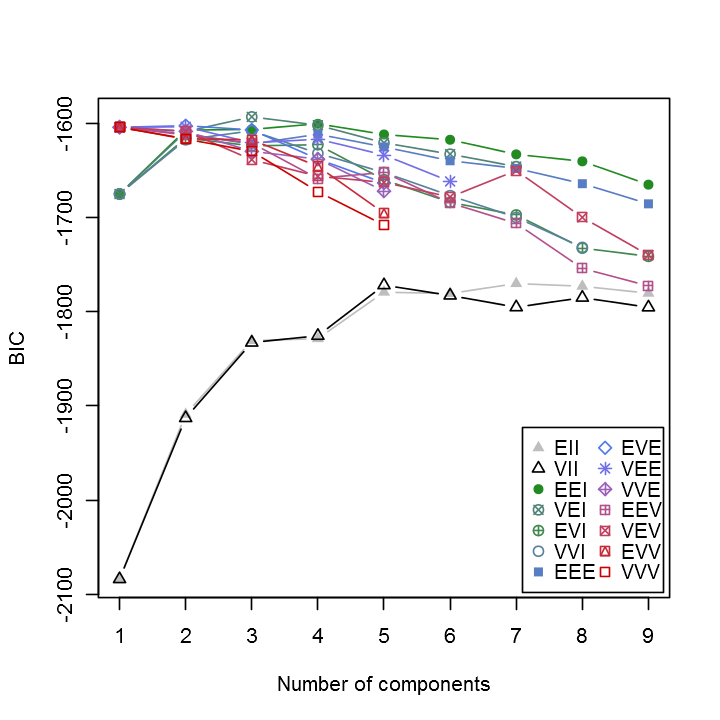

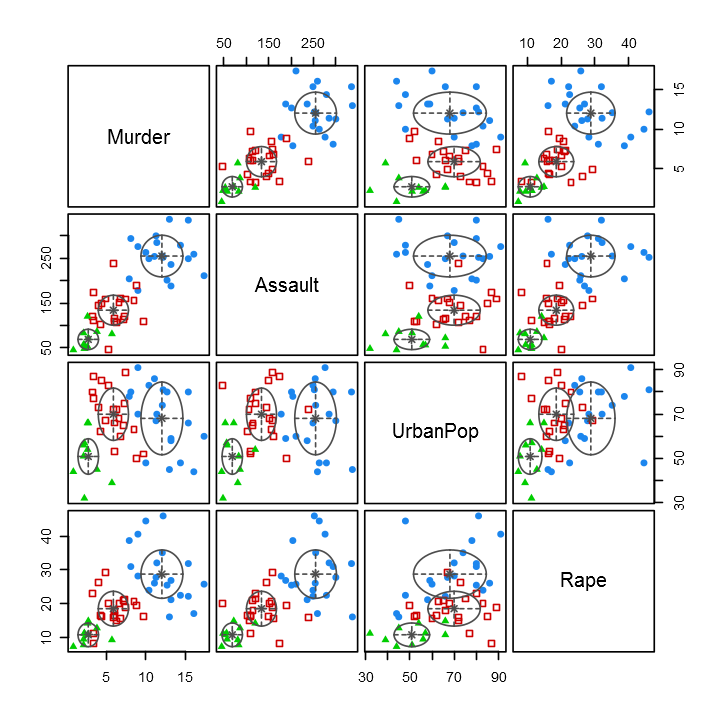

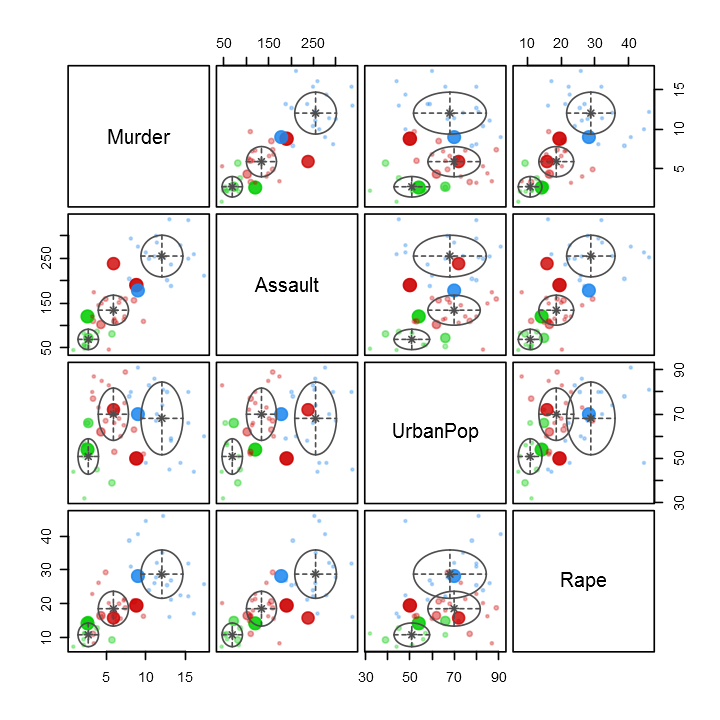

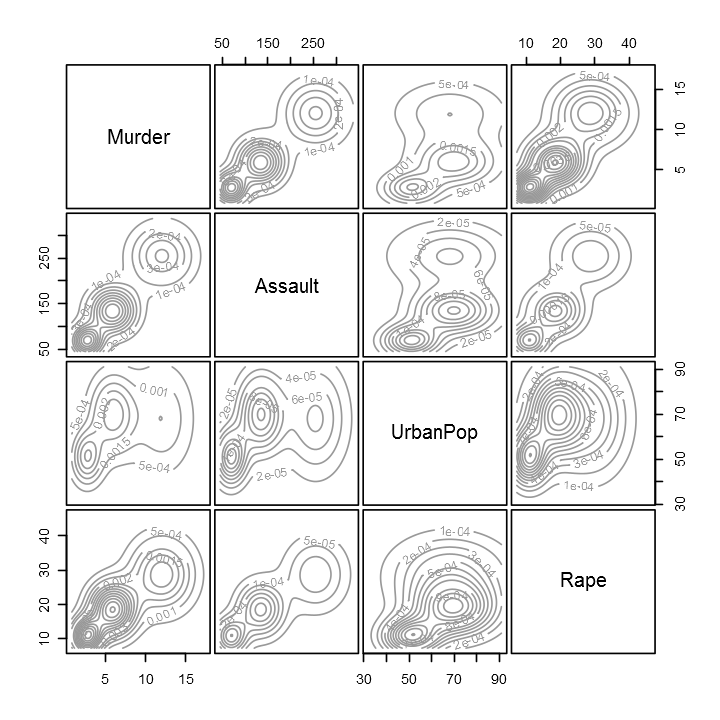

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
plot(mc)

 - 함수 내에 Cluster수를 지정해줄 수 있다. 
 - plot을 그린다면 지정된 수의 plot만 그려진다.

In [10]:
mc = Mclust(USArrests,4)

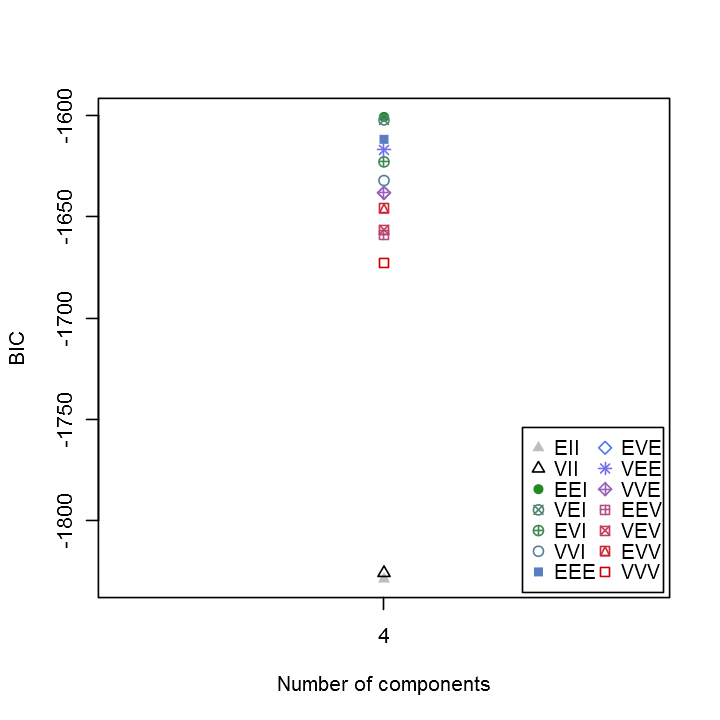

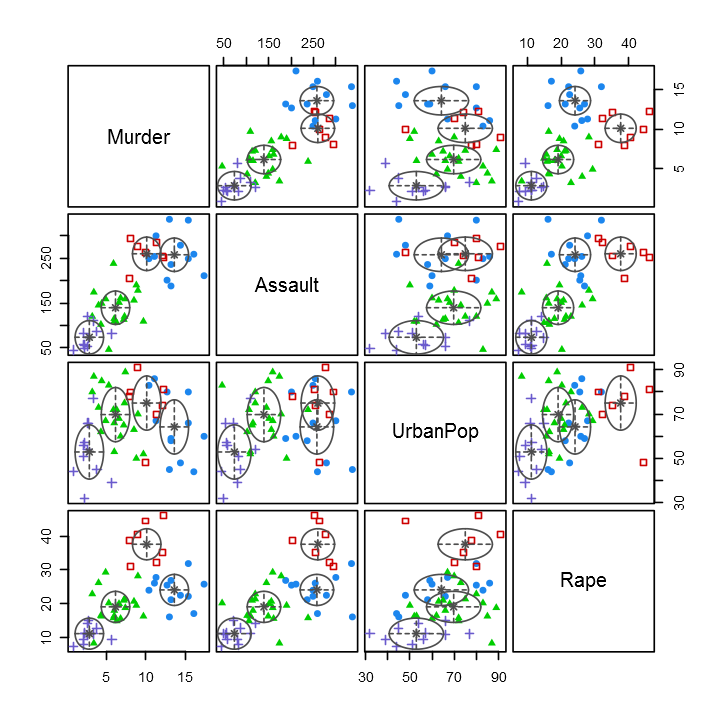

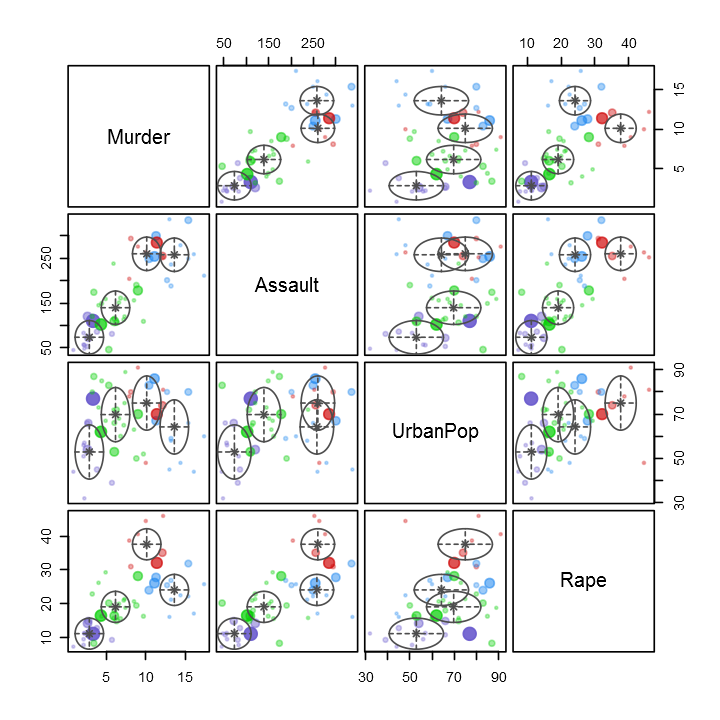

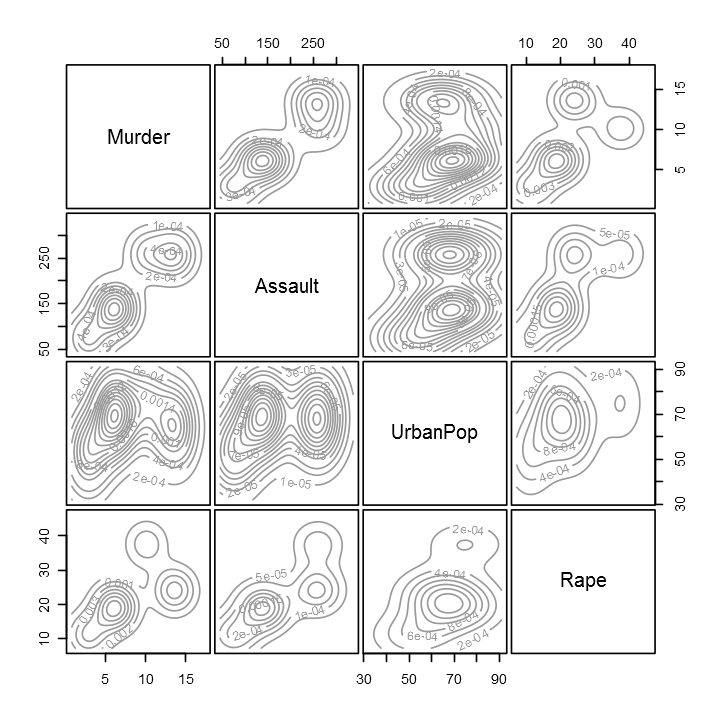

In [11]:
plot(mc)

In [12]:
mc$classification

Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              4              3              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              1              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              4              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              4              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              1              1              4              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             4              1              1              3              4 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              4              4              3

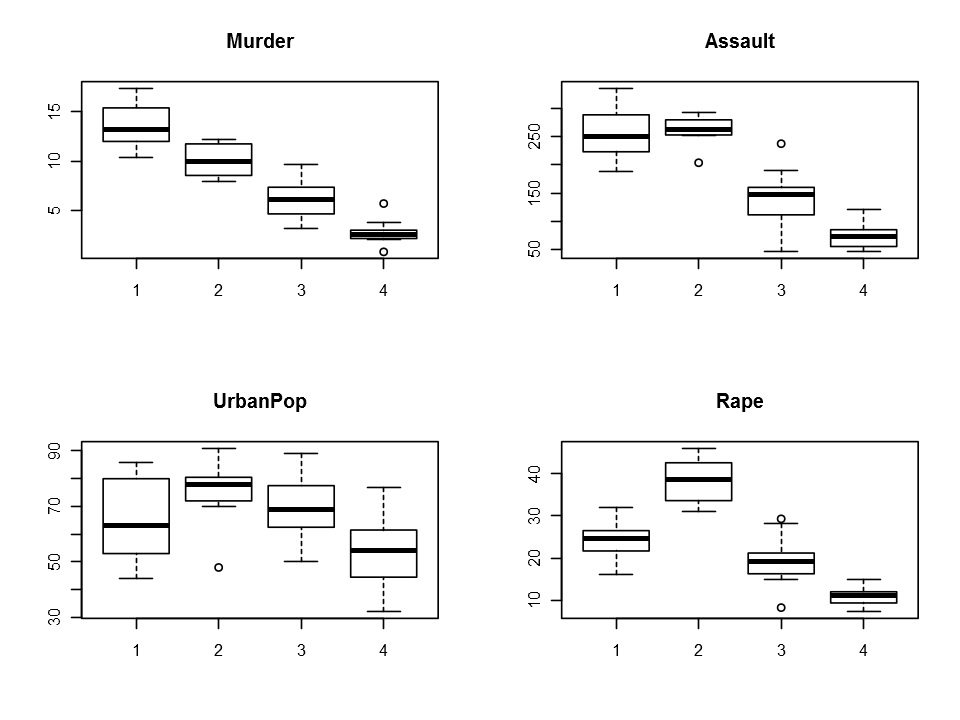

In [13]:
options(repr.plot.width=8,repr.plot.height=6)
par(mfrow=c(2,2))
for(i in 1:4){
    boxplot(USArrests[,i]~mc$classification, main=names(USArrests)[i])
}

In [14]:
USArrests_s = as.data.frame(scale(USArrests))

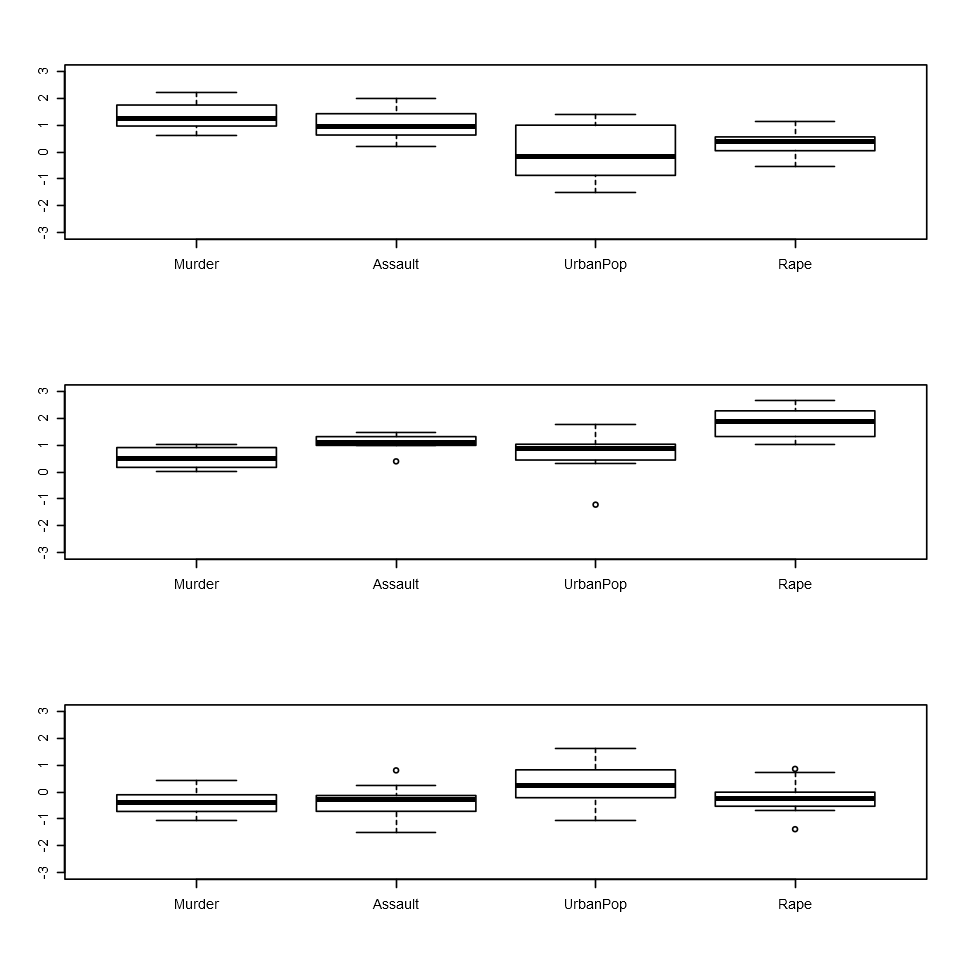

In [15]:
options(repr.plot.width=8,repr.plot.height=8)
par(mfrow=c(3,1))
for(i in 1:3){
    boxplot(USArrests_s[mc$classification==i,],ylim=c(-3,3))
}

In [17]:
library(psych)

In [18]:
result = describeBy(USArrests[,1],group=mc$classification,mat=T)

In [19]:
result

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X11,1,1,1,12,13.6333333333333,2.15462856251936,13.2,13.58,2.9652,10.4,17.4,7,0.132738236448492,-1.30156884349429,0.621987690287104
X12,2,2,1,7,10.1,1.83303027798234,10,10.1,2.81694,7.9,12.2,4.3,-0.012107752838349,-1.99788933430515,0.692820323027551
X13,3,3,1,20,6.25,1.88442368685467,6.15,6.23125,1.85325,3.2,9.7,6.5,0.101073156893866,-1.10019594450456,0.421369946221782
X14,4,4,1,11,2.73636363636364,1.24118711504167,2.6,2.62222222222222,0.7413,0.8,5.7,4.9,0.918686442053678,0.565351207601512,0.374231995928808


In [21]:
options(repr.plot.width=5,repr.plot.height=5)
library(ggplot2)

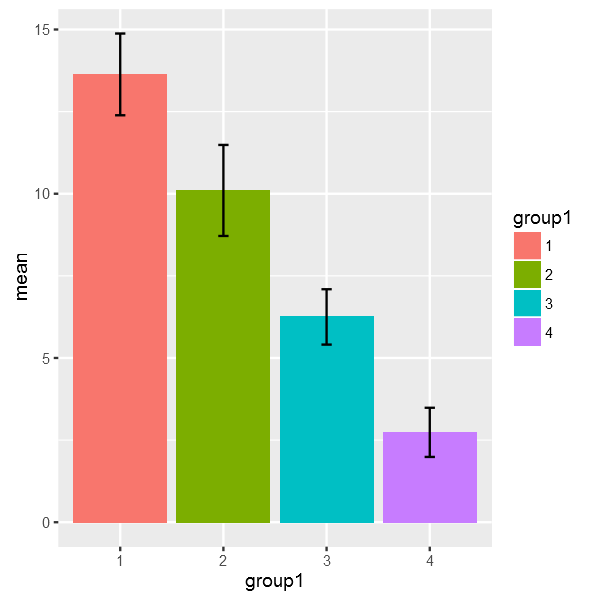

In [22]:
gg <- ggplot(result, aes(x=group1,y=mean,fill=group1))
gg + geom_bar(position = position_dodge(), stat="identity") + geom_errorbar(aes(ymin=mean-2*se,ymax=mean +2*se, width=0.1))

 - 비교하고 싶은 대상을 어떠한 기준으로 비교 할것인가
 - Degree of Freedom : 비교하고 싶은 대상 ( 그룹 ) - 1 개가 나와야 한다.
 - 4집단의 평균이 같다 라는 것이 $H_0$ 귀무 가설
 - 4개 중 하나라도 평균이 다르다 라는 것이 $H_1$이 대립가설 

In [23]:
model = aov(USArrests$Murder~factor(mc$classification))
summary(model)

                          Df Sum Sq Mean Sq F value Pr(>F)    
factor(mc$classification)  3  775.5  258.48   77.16 <2e-16 ***
Residuals                 46  154.1    3.35                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 - 귀무 가설이 기각이 된다면 어떤 집단 평균이 다른가? 
  - 사후 검정(Tukey Test)
 - TukeyHSD 를 통해 비교 결과를 추출 
  - P-value와 앞의 비교 대상 List Check

In [24]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = USArrests$Murder ~ factor(mc$classification))

$`factor(mc$classification)`
          diff        lwr       upr     p adj
2-1  -3.533333  -5.853615 -1.213052 0.0010537
3-1  -7.383333  -9.164780 -5.601887 0.0000000
4-1 -10.896970 -12.933451 -8.860488 0.0000000
3-2  -3.850000  -5.992502 -1.707498 0.0001019
4-2  -7.363636  -9.722454 -5.004819 0.0000000
4-3  -3.513636  -5.344993 -1.682280 0.0000347


## Practice 5 
 - 모형기반 군집화를 통해 비행기를 군집화 해봐라 

In [25]:
jet <- read.csv("jet.csv", stringsAsFactors = T)
str(jet)

'data.frame':	22 obs. of  7 variables:
 $ X  : Factor w/ 22 levels "F-100A","F-101A",..: 19 20 9 17 12 14 10 21 18 1 ...
 $ FFD: int  82 89 101 107 115 122 127 137 147 166 ...
 $ SPR: num  1.47 1.6 2.17 2.05 2.47 ...
 $ RGF: num  3.3 3.64 4.87 4.72 4.11 3.75 3.97 4.65 3.84 4.92 ...
 $ PLF: num  0.166 0.154 0.177 0.275 0.298 0.15 0 0.117 0.155 0.138 ...
 $ SLF: num  0.1 0.1 2.9 1.1 1 0.9 2.4 1.8 2.3 3.2 ...
 $ CAR: Factor w/ 2 levels "no","yes": 1 1 2 1 2 1 2 1 1 2 ...


In [26]:
mc_jet = Mclust(jet[,2:5])
mc_jet

'Mclust' model object:
 best model: ellipsoidal multivariate normal (XXX) with 1 components

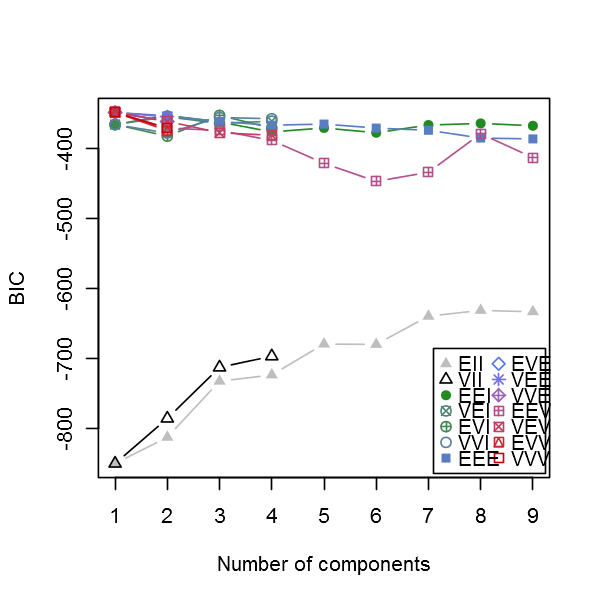

Warning message:
In min(r, na.rm = TRUE): min에 전달되는 인자들 중 누락이 있어 Inf를 반환합니다Warning message:
In max(r, na.rm = TRUE): max에 전달되는 인자들 중 누락이 있어 -Inf를 반환합니다Warning message:
In min(r, na.rm = TRUE): min에 전달되는 인자들 중 누락이 있어 Inf를 반환합니다

ERROR: Error in rgb(x[1L, ], x[2L, ], x[3L, ], x[4L, ]): 알파레벨이 [0,1] 내에 있어야 하는데 nan를 가집니다.


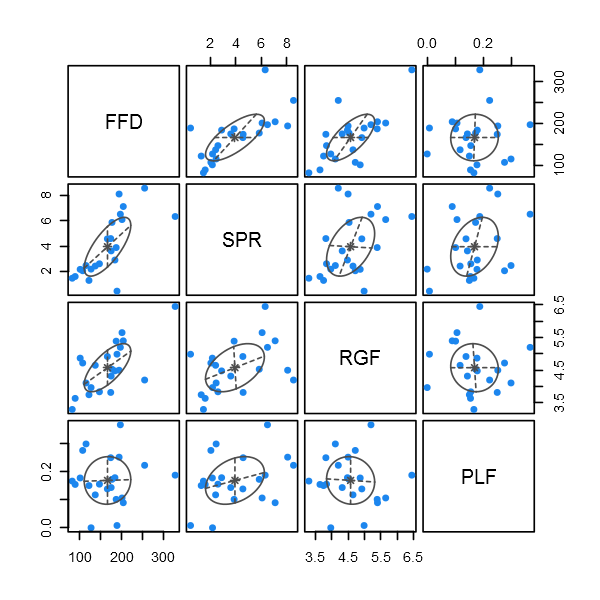

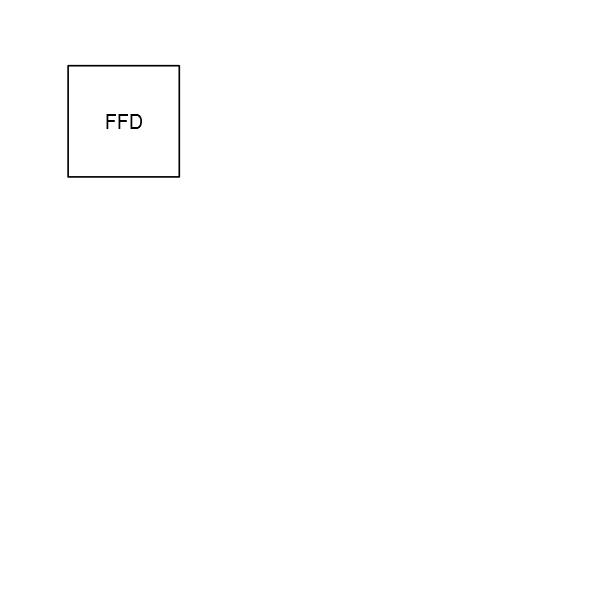

In [27]:
plot(mc_jet)

In [28]:
summary(mc_jet)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust XXX (ellipsoidal multivariate normal) model with 1 component:

 log.likelihood  n df       BIC       ICL
      -152.7171 22 14 -348.7089 -348.7089

Clustering table:
 1 
22 

In [29]:
mc_jet2 = Mclust(jet[,2:5],2)
mc_jet2

'Mclust' model object:
 best model: diagonal, equal volume and shape (EEI) with 2 components

In [30]:
summary(mc_jet2)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 2 components:

 log.likelihood  n df       BIC       ICL
      -156.4029 22 13 -352.9894 -353.9347

Clustering table:
 1  2 
15  7 

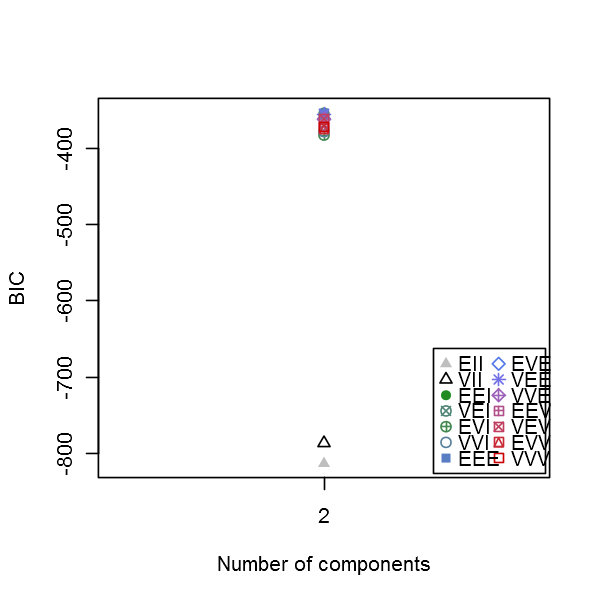

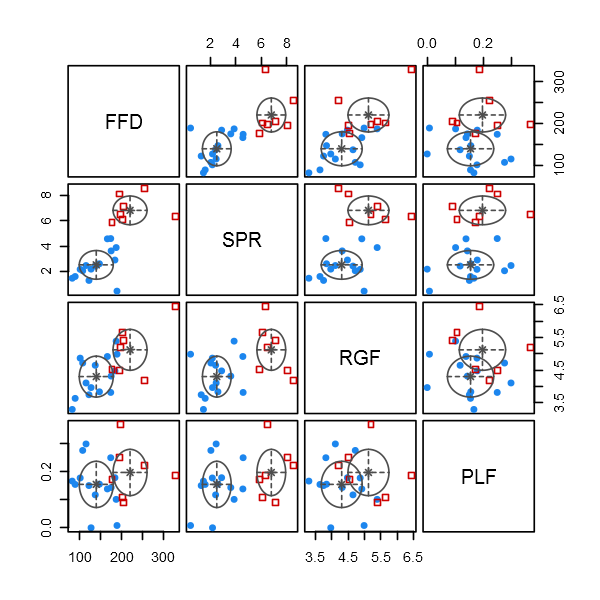

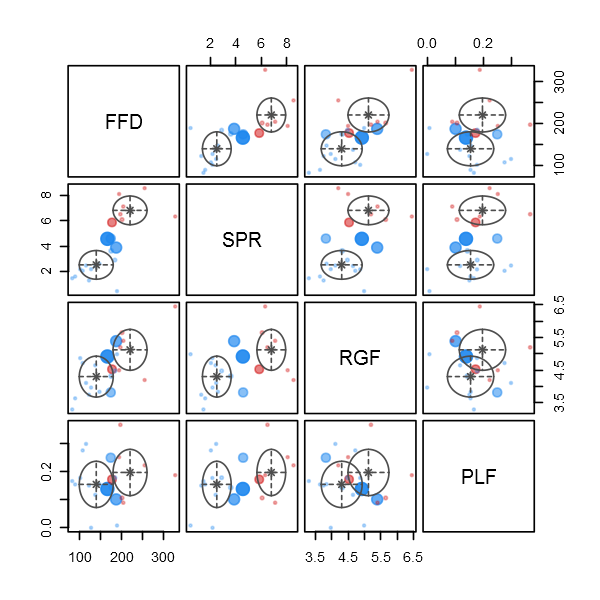

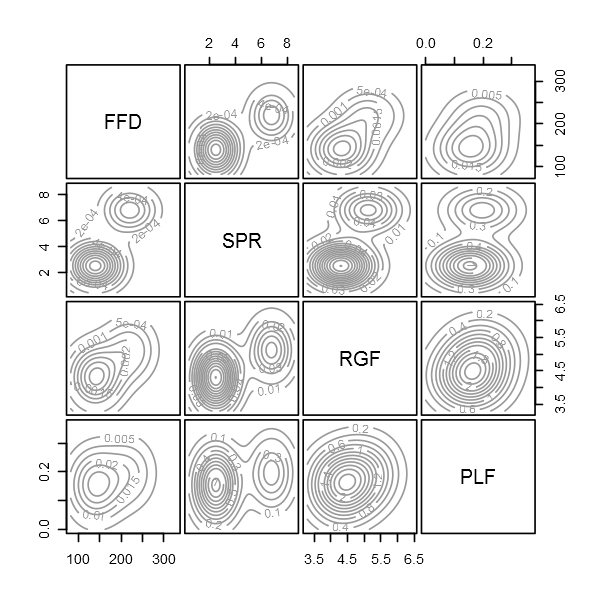

In [31]:
plot(mc_jet2)